In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR Employee Attrition.csv")

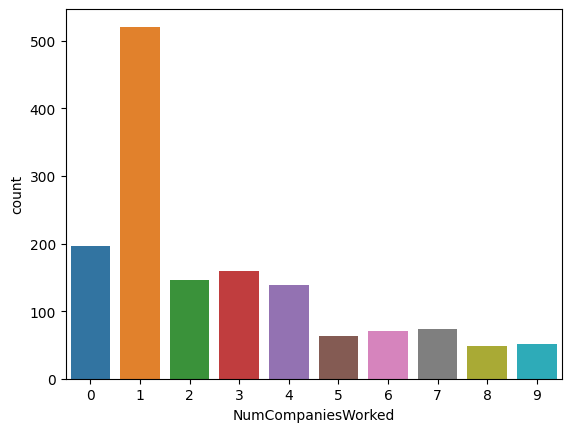

In [4]:
sns.countplot(data=df, x="NumCompaniesWorked")
plt.show()

이직데이터인데 이전에 일했던 회사의 수가 0인 것은 말이 되지 않는다.  
해당 column이 현재 다니는 회사는 제외한 경우를 나타내야 한다.  
즉, 다녔던 회사가 현재 다니는 회사 뿐이라면(NumCompaniesWorkded에서 0을 보이는 행이라면) TotalWorkingYears와 YearsAtCompany는 같아야 한다.  

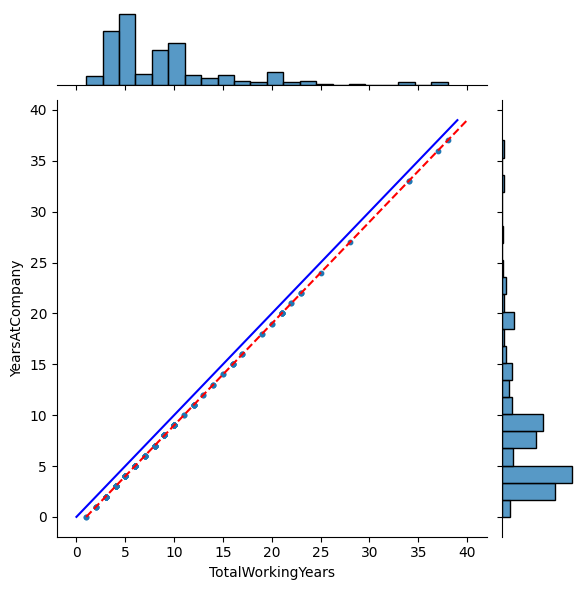

In [53]:
worked_0 = list(df[df["NumCompaniesWorked"]==0].index)
grid = sns.JointGrid(data=df.iloc[worked_0], x="TotalWorkingYears", y="YearsAtCompany")
grid.plot_joint(plt.scatter, s=10)
grid.plot_marginals(sns.histplot)
plt.plot(list(range(40)), "b-")
plt.plot(list(range(1,41)), list(range(40)), "r--")
plt.show()

점들이 y=x-1 그래프 상에 있기 때문에 ToTalWorkingYears가 YearsAtCompany보다 1크다.

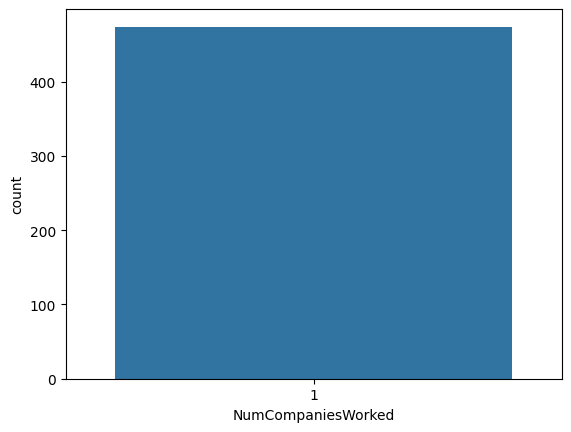

In [58]:
same_working_time = list(df[df["TotalWorkingYears"]==df["YearsAtCompany"]].index)
sns.countplot(data=df.iloc[same_working_time], x="NumCompaniesWorked")
plt.show()

y=x 상에 있는 (TotalWorkingYears와 YearsAtCompany는 같은) 행들의 NumCompneisWorked 값은 모두 1이다.

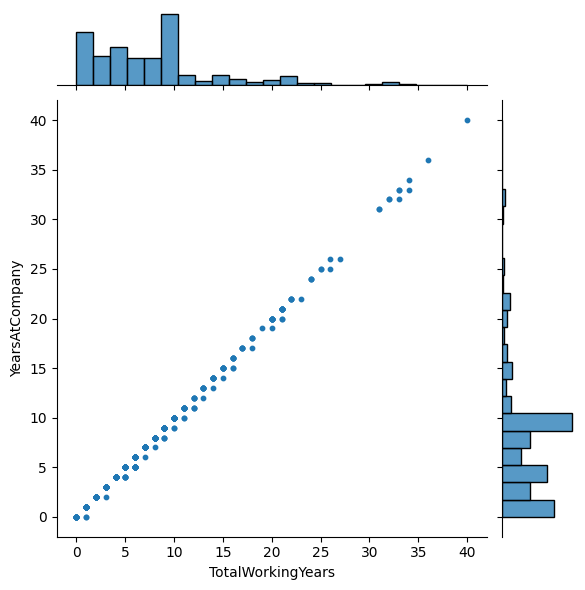

In [60]:
worked_0 = list(df[df["NumCompaniesWorked"]==1].index)
grid = sns.JointGrid(data=df.iloc[worked_0], x="TotalWorkingYears", y="YearsAtCompany")
grid.plot_joint(plt.scatter, s=10)
grid.plot_marginals(sns.histplot)
plt.show()

또한 NumCompaniesWorked가 1인 사람 중에는 TotalWorkingYears와 YearsAtCompany가 1 차이가 나는 사람도 있다.

정리하면  
-   NumCompaniesWorked가 현재 다니는 회사를 제외했다면 1인 값을 가진 사람들도 이전에 한 회사는 거쳤기 떄문에 TotalWorkingYears와 YearsAtCompany가 같아서는 안된다.  
    하지만 1인 값을 가진 사람들 중 차이가 나는 사람이 있기 때문에 